In [87]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii
from scipy.optimize import curve_fit
from lmfit import Model, minimize, Parameters, report_fit
from lmfit.models import GaussianModel, PolynomialModel

def Gauss(x, A, B, C):
    #y = A*np.exp(-1*B*x**2)
    y = A*np.exp(-(x-B)**2 / (2.*C**2))
    return y

OH67 = ascii.read('C:/Users/seven/OneDrive/Documents/OH67 Baseline Sub/OH119210p2000_67basesub.csv')
OH65 = ascii.read('C:/Users/seven/OneDrive/Documents/OH65 Baseline Sub/OH119210p2000_65basesub.txt')
HI = ascii.read('C:/Users/seven/OneDrive/Documents/HI Data/HI119070p2800.txt', data_start = 13, data_end = 167)
CO = ascii.read('C:/Users/seven/OneDrive/Documents/CO Data Total/COpol119070p2800.txt')

In [88]:
#defining vel and Ta for data
vel67 = OH67['col1']
Ta67 = OH67['col2']
vel65 = OH65['col1']
Ta65 = OH65['col2']
velH = HI['col1']
TaH = HI['col2']
velCO = CO['col1']
TaCO = CO['col2']

In [89]:
#parameters for OH67
igoodOH = np.where((vel67 >= -150) & (vel67 <= -100))[0]
igoodOH1 = np.where((vel67 >= -30) & (vel67 <= 30))[0]

parametersOH, covarianceOH = curve_fit(Gauss, vel67[igoodOH1], Ta67[igoodOH1], p0 = [0.03, 0, 4])
fit67A = parametersOH[0]
fit67B = parametersOH[1]
fit67C = parametersOH[2]
fit_67y = Gauss(vel67, fitOHA, fitOHB, fitOHC)

In [173]:
#parameters for OH65
igood65 = np.where((vel67 >= -150) & (vel67 <= -100))[0]
igood651 = np.where((vel67 >= -30) & (vel67 <= 30))[0]

parameters65, covariance65 = curve_fit(Gauss, vel67[igood651], Ta67[igood651], p0 = [0.03, 0, 4])
fit65A = parameters65[0]
fit65B = parameters65[1]
fit65C = parameters65[2]
fit_65y = Gauss(vel65, fit65A, fit65B, fit65C)

In [174]:
#parameters for CO
igoodCO = np.where((velCO >= -150) & (velCO <=150))

parametersCO, covarianceCO = curve_fit(Gauss, velCO[igoodCO], TaCO[igoodCO], p0=[0.03, 0, 4])
fitCOA = parameters[0]
fitCOB = parameters[1]
fitCOC = parameters[2]
fit_COy = Gauss(velCO, fitCOA, fitCOB, fitCOC)

In [175]:
#parameters for HI
igoodH = np.where((velH >= -100) & (velH <=100))
parametersH, covarianceH = curve_fit(Gauss, velH[igoodH], TaH[igoodH], p0=[0.03, 0, 4])

fitHA = parametersH[0]
fitHB = parametersH[1]
fitHC = parametersH[2]
fit_Hy = Gauss(velH, fitHA, fitHB, fitHC)

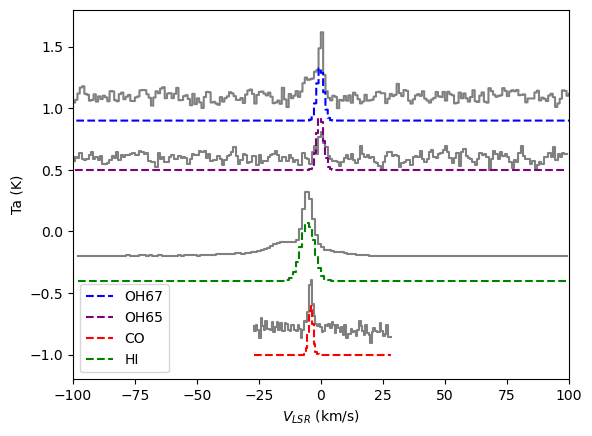

In [176]:
plt.step(vel67, Ta67*12 + 1.1, 'grey')
plt.step(vel67, fit_67y*12 + 0.9, 'blue',ls = 'dashed', label = 'OH67')

plt.step(vel65, Ta65*12+0.6, 'grey')
plt.step(vel65, fit_65y*12+0.5, 'purple', ls = 'dashed', label = 'OH65')


plt.step(velCO, TaCO/4-0.8, 'grey')
plt.step(velCO, fit_COy/4-1, 'red', ls = 'dashed', label = 'CO')

plt.step(velH, TaH/60-0.2, 'grey')
plt.step(velH, fit_Hy/60 -0.4, 'green',ls = 'dashed', label = 'HI')

plt.xlim(-100, 100)
plt.ylim(-1.2, 1.8)

#plt.axhline(0.6)
#plt.axhline(-0.9)
#plt.axhline(-0.2)
plt.xlabel(r'$V_{LSR}$ (km/s)')
plt.ylabel('Ta (K)')
plt.legend()

In [177]:
#OH67 integral, err, and signal noise
igoodNoise67 = np.where((vel67 >= -150) & (vel67 <= -30))[0]
integralOH67 = np.sum(Ta67[igoodOH1])*(vel67[1]-vel67[0])
err = np.sqrt(len(vel67[igoodOH1])) * np.std(Ta67[igoodNoise67]) * (vel67[1]-vel67[0])
print(integralOH67)
print(err)

0.13126153261734147
0.022356232665127262


In [178]:
#OH65 integral, err, and signal noise
igoodNoise65 = np.where((vel65 >= -150) & (vel65 <= -30))[0]
integralOH65 = np.sum(Ta65[igood651])*(vel65[1]-vel65[0])
err65 = np.sqrt(len(vel65[igood651])) * np.std(Ta65[igoodNoise65]) * (vel65[1]-vel65[0])
print(integralOH65)
print(err65)

IndexError: index 291 is out of bounds for axis 0 with size 215

In [168]:
#CO integral, err, and signal noise
igoodNoiseCO = np.where((velCO >= 5) & (velCO <=30))
integralCO = np.sum(TaCO[igoodCO])*(velCO[1]-velCO[0])
errCO = np.sqrt(len(velCO[igoodCO])) * np.std(TaCO[igoodNoiseCO]) * (velCO[1]-velCO[0])
print(integralCO)
print(errCO)

5.110676637258199
0.9316532902351177


In [172]:
#HI integral, err, and signal noise
igoodNoiseHI = np.where((velH >= 50) & (velH <= 100))
integralHI  = np.sum(TaH[igoodH])*(velH[1]-velH[0])
errHI = np.sqrt(len(velH[igoodH])) * np.std(TaH[igoodNoiseHI]) * (velH[1]-velH[0])
print(integralHI)
print(errHI)

328.86912000000024
1.1039438120719587


Text(0.5, 1.0, 'OH65')

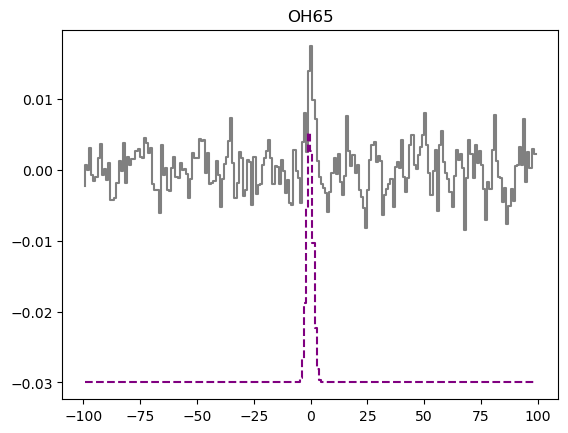

In [141]:
plt.step(vel65, Ta65, 'grey')
plt.step(vel65, fit_65y-0.03, 'purple', ls = 'dashed', label = 'OH65')
plt.title('OH65')

Text(0.5, 1.0, 'OH67')

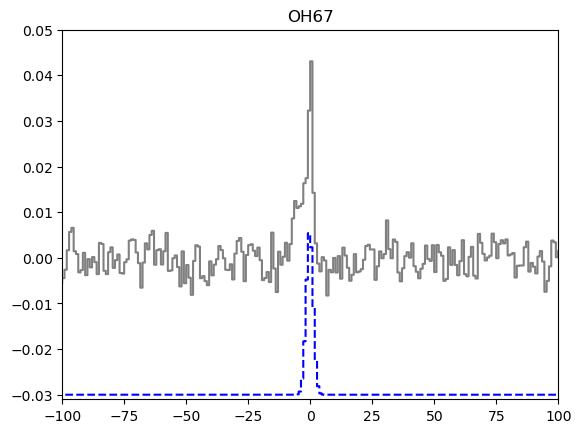

In [124]:
plt.step(vel67, Ta67, 'grey')
plt.step(vel67, fit_67y-0.03, 'blue',ls = 'dashed', label = 'OH67')
plt.xlim(-100, 100)
plt.ylim(-0.031 , 0.05)
plt.title('OH67')

Text(0.5, 1.0, 'CO')

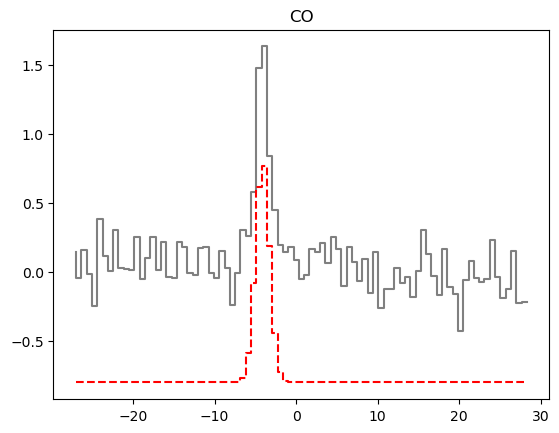

In [127]:
plt.step(velCO, TaCO, 'grey')
plt.step(velCO, fit_COy-0.8, 'red', ls = 'dashed', label = 'CO')
plt.title('CO')

Text(0.5, 1.0, 'HI')

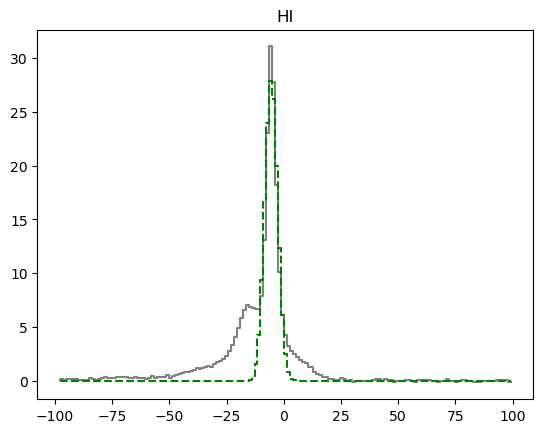

In [119]:
plt.step(velH, TaH, 'grey')
plt.step(velH, fit_Hy, 'green',ls = 'dashed', label = 'HI')
plt.title('HI')